# Sesión 27. Algoritmos de Kruskal y Prim

**Colaboradores**
- Jerónimo Jahir Avendaño Pachuca
- César Ricardo Segura Alejo

<a id='indice'></a>
### Índice
---
1. [Introducción](#introduccion)
1. [Matroides](#matroides)
1. [MST-Greedy](#mst-greedy)
1. [Kruskal](#kruskal)
1. [Prim](#prim)
1. [Referencias](#referencias)
---

<a id='introducción'></a>
## Introducción

Una forma de introducción a los **árboles generadores de peso mínimo** (**MST**, minimun-spannig-tree) es a través de los circuitos electronicos. En una placa de componentes que deben de estar en una misma línea una forma de reducir la cantidad de material gastado es usando **árboles generadores**, ya que pasan por los $n$ nodos usando $n-1$ aristas (la cantidad mínima). Sin embargo, hay cierta distancia entre cada componente y se debe de utilizar una cierta cantidad de material para construirlo, lo que nos lleva a ponderar las aristas y convertir el problema en uno de **árboles de expansión**. Acorde al **Notebook 21** los grafos son **matroides**, la demostración se menciona a continuación, y por lo tanto se pueden resolver con **algoritmos greedy**.

Para modelar este problema, se requiere de un grafo no dirigido $G = (V,E)$ tal que para arista $(u,v) \in E$ se le atribuye un peso $w(u,v)$ que es lo que cuesta ir del vértice $u$ al vértice $v$. La meta de este problema es encontrar un grafo acíclico $T\subset E$ tal que se minimiza el peso total de $T$, $i.e.$, $$ w(T) = \sum_{(u,v)\in T}w(u,v)$$ es mínimo. En otras palabras, encontrar el árbol generador de peso mínimo.

De las clases en MAC de Opmitización II o Teoría de Graficas, recordaran que existen 2 algoritmos para solucionar este problema, **Krustal** y **Prim**. Más adelante hablaremos de por qué cada uno corre en $O(E\ lg\ V)$.

Para que el algoritmo de Prim logre este tiempo debe de usar **binary heaps** como una cola de prioridad. Una forma de optimizarlo es con **Fibonnachi Heaps** logrando correr en $O(E + V lg V)$ con el único inconveniente de que $V$ tiene que crecer a un ritmo menor que E, $i.e.$, $\theta(V)=O(\theta(E))$.

Regresar al **[Índice](#indice)**.
<a id='Matroides'></a>
## Matroides

Una **matroide** es un par ordenado $M = (S, \mathcal{I})$ con\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$S$: $S\neq\empty$, llamado el conjunto universo o el conjunto base.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathcal{I}$: $\mathcal{I}\subset\mathbb{P}(S)$, la potencia de $S$, llamados subconjuntos independientes.\
que satisface las siguientes condiciones.

1. $\emptyset \in$ $\mathcal{I}$.
   
2.  **Propiedad Hereditaria**: Si $\ B \in \mathcal{I}$ y  $\ A\subseteq B$, entonces $\ A \in \mathcal{I}$. 
   
3. **Propiedad de intercambio**: Si $\ A \in \mathcal{I}$, $B \in \mathcal{I}\ $ y $\ |A| < |B| \Longrightarrow \ \exists x\in B-A$ tal que $ A \cup x \in \mathcal{I}$.

La propiedad hereditaria tambien puede ser vista como todo subconjunto de un conjunto independiente también es independiente.

La propiedad de intercambio permite intercambiar elementos manteniendo la independencia

 Referencias [$[1]$](#referencias).

### Matroide-Grafo

Un grafo $G = (E,V)$ es una matroide $M = (S, \mathcal{I})$ con $S = E$ e $\ \mathcal{I}$ todos los subconjuntos de aristas que no forman ciclos.


**Demostración**

Dado que una grafica no contiene ciclos, $\empty\in\mathcal{I}$

Sea $X$ una grafica sin ciclos, $\forall x \in X$ es un gráfica sin ciclos, pues se requeriría añadir aristas para formar ciclos y se están restando, $i.e.$, $x\in \mathcal{I}$



Regresar al **[Índice](#indice)**.
<a id='MST-greedy'></a>
## MST-Greedy

>  $MST-GREEDY(M,x)$
> 1. A =  $\empty$
> 5. Ordenar $M.S$ en orden ascendente de acuerdo al peso $w$
> 6. **for each** arista $x \in M.S$ tomada de la lista en orden
> 7. &nbsp;&nbsp;&nbsp;&nbsp;**if** $A \cup \{x\}\in M.I$
> 8. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$A = A \cup \{x\}$
> 10. **return** $A$


<a id='Kruskal'></a>
## Kruskal

A continuación se presenta el algoritmo de Krusal así como las funciones a las que hacer referencía. También la implementación proporcionada en el **Notebook 21**.

>  $KRUSKAL(G,w)$
> 1. A =  $\empty$
> 2. **for each** $v \in G.V$
> 3. &nbsp;&nbsp;&nbsp;&nbsp;$MAKE-SET(v)$
> 4. Crear una lista de aristas con peso
> 5. Ordenar la lista de aristas en orden ascendente de acuerdo al peso $w$
> 6. **for each** arista $(u,v)$ tomada de la lista en orden
> 7. &nbsp;&nbsp;&nbsp;&nbsp;**if** $FIND-SET(u) \neq FIND-SET(v)$
> 8. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$A = A \cup \{(u,v)\}$
> 9. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$UNION(u,v)$
> 10. **return** $A$


> $MAKE-SET(x)$ 
> 1. $x.p = x$ 
> 2. $x.rank = 0$

> $FIND-SET(x)$
> 1. **if** $x \neq x.p$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange">//¿Es el nodo raíz?</span>
> 2. &nbsp;&nbsp;&nbsp; $x.p = FIND-SET(x.p)$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange">//La raíz se convierte en el padre</span>
> 3. **return** $x.p$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange">//Retornar la raíz</span>

> $UNION(x,y)$
> **if** $x.rank > y.rank$
> 1. &nbsp;&nbsp;&nbsp;&nbsp;$LINK(FIND-SET(x), FIND-SET(y))$

> $LINK(x,y)$
> 1. **if** $x.rank > y.rank$
> 1. &nbsp;&nbsp;&nbsp;&nbsp; $y.rank = x$
> 1. **else**
> 1. &nbsp;&nbsp;&nbsp;&nbsp;$x.p = y$
> 1. &nbsp;&nbsp;&nbsp;&nbsp;**if** $x.rank == y.rank$
> 1. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y.rank = r.rank + 1$


Implementación por *César Segura A.*

In [4]:
# Definición de la estructura de datos para representar un grafo
struct Edge
    u::Int  # Nodo 1
    v::Int  # Nodo 2
    weight::Float64  # Peso de la arista
end

# Función para encontrar el conjunto al que pertenece un nodo (Union-Find)
function find(parent, node)
    if parent[node] != node
        parent[node] = find(parent, parent[node])  # Path compression
    end
    return parent[node]
end

# Función para unir dos subconjuntos (Union-Find)
function union(parent, rank, u, v)
    root_u = find(parent, u)
    root_v = find(parent, v)
    
    if root_u != root_v
        if rank[root_u] > rank[root_v]
            parent[root_v] = root_u
        elseif rank[root_u] < rank[root_v]
            parent[root_u] = root_v
        else
            parent[root_v] = root_u
            rank[root_u] += 1
        end
    end
end

# Algoritmo de Kruskal
function kruskal(num_nodes::Int, edges::Vector{Edge})
    # Ordenar las aristas por peso
    sorted_edges = sort(edges, by = e -> e.weight)
    
    # Inicializar estructuras para Union-Find
    parent = collect(1:num_nodes)
    rank = fill(0, num_nodes)
    
    # Conjunto solución para el Árbol Generador Mínimo
    mst = Vector{Edge}()
    
    for edge in sorted_edges
        u, v = edge.u, edge.v
        # Si no forma un ciclo, agregar la arista al MST
        if find(parent, u) != find(parent, v)
            push!(mst, edge)
            union(parent, rank, u, v)
        end
    end
    
    return mst
end


kruskal (generic function with 1 method)

In [6]:
edges = [
    Edge(1, 2, 4.0),
    Edge(1, 8, 8.0),
    Edge(2, 3, 8.0),
    Edge(2, 8, 11.0),
    Edge(3, 4, 7.0),
    Edge(3, 9, 2.0),
    Edge(4, 5, 9.0),
    Edge(4, 6, 14.0),
    Edge(5, 6, 10.0),
    Edge(6, 7, 2.0),
    Edge(6, 3, 4.0),
    Edge(7, 8, 1.0),
    Edge(7, 9, 6.0),
    Edge(8, 9, 7.0)
]

num_nodes = 9
mst = kruskal(num_nodes, edges)

# Mostrar el Árbol Generador Mínimo
println("Árbol Generador Mínimo:")
sum = 0
for edge in mst
    println("Nodo $(edge.u) - Nodo $(edge.v) | Peso: $(edge.weight)")
    sum += edge.weight
end
println("Peso del árbol generador mínimo: $(sum)")

Árbol Generador Mínimo:
Nodo 7 - Nodo 8 | Peso: 1.0
Nodo 3 - Nodo 9 | Peso: 2.0
Nodo 6 - Nodo 7 | Peso: 2.0
Nodo 1 - Nodo 2 | Peso: 4.0
Nodo 6 - Nodo 3 | Peso: 4.0
Nodo 3 - Nodo 4 | Peso: 7.0
Nodo 1 - Nodo 8 | Peso: 8.0
Nodo 4 - Nodo 5 | Peso: 9.0
Peso del árbol generador mínimo: 37.0


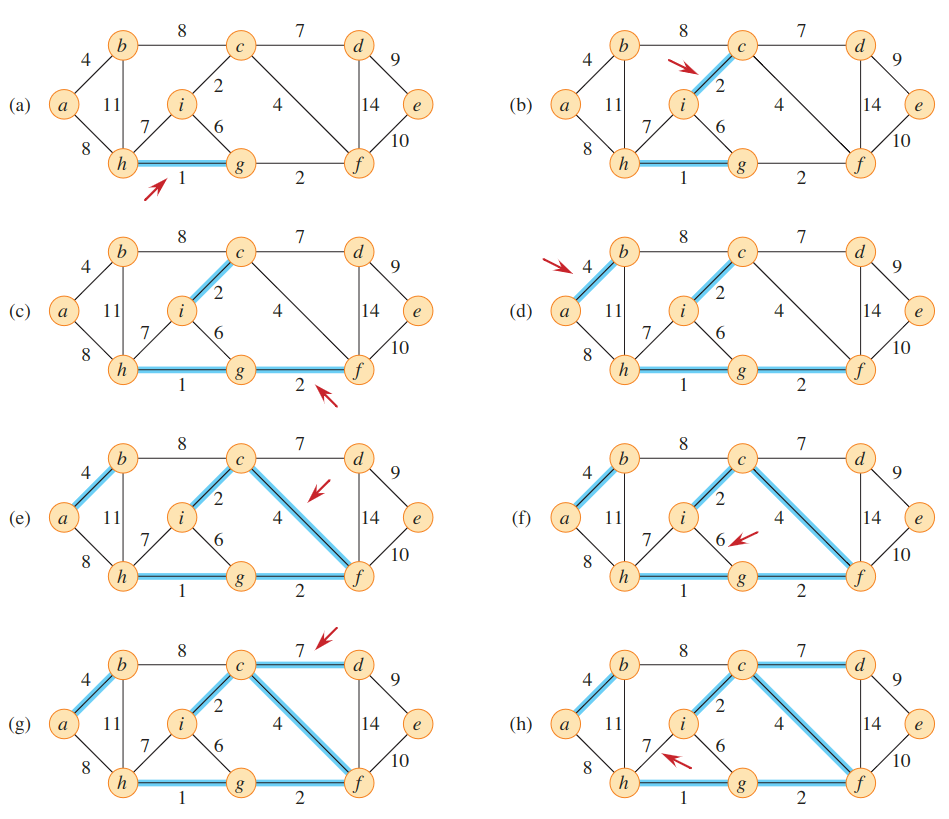
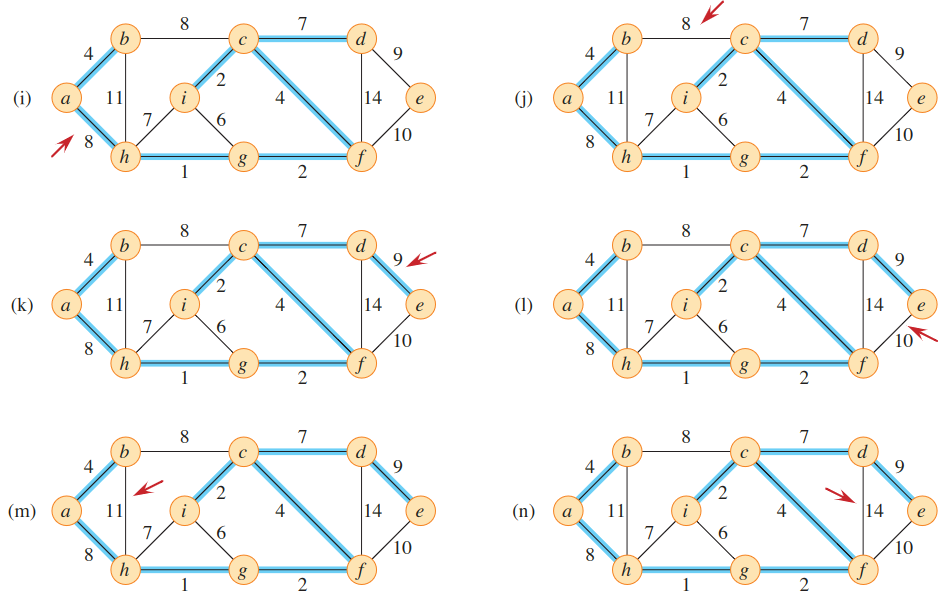

Regresar al **[Índice](#indice)**.
<a id='Prim'></a>
## Prim

Al igual que el algoritmo de Kruskal, el algoritmo de Prim es un caso especial del método generico del árbol generador de peso mínimo.


s  a  special  case  of  the  generic  min- 
imum-spanning-tree  method  from Section  21.1.  Prim9s algorithm operates much 
like  Dijkstra9s  algorithm  for  ûnding  shortest  paths  in a graph,  which we9ll  see in 
Section 22.3.  Prim9s algorithm has the property that the edges in the set A always 
form  a  single  tree.  As  Figure  21.5  shows,  the  tree  starts  from  an arbitrary root 
vertex r  and grows until it spans all the vertices in V . Each step adds to the tree A 

Regresar al **[Índice](#indice)**.
<a id='Referencias'></a>
## Referencias

$[1]$ Cormen, T. H., Leiserson, C. E., Rivest, R. L. y Stein C. (2022). **Introduction to algorithms**. MIT Press, 4E.